#### Sr. Engineer: Dhruv Singh <br> Project Name: Success Classifier <br> Phase: Modelling - Decision Trees Vizualization <br> Date Updated: 01/22/2022

How do you understand how a decision tree makes predictions?
One of the strengths of decision trees are that they are relatively easy to interpret as you can make a visualization based on your model. This is not only a powerful way to understand your model, but also to communicate how your model works to stakeholders. 


In this video, I'll show you how Decision Trees can be plotted with Matplotlib.

## Import Libraries

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

## Load the Dataset
The Iris dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. The code below loads the iris dataset.

In [2]:
data = pd.read_csv('1_readonly/Services.csv')

## Split Data into Training and Test Sets

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(data.iloc[:,:11], data['Employed'], random_state=0)

## Scikit-learn 4-Step Modeling Pattern

<b>Step 1:</b> Import the model you want to use

In sklearn, all machine learning models are implemented as Python classes

In [4]:
# This was already imported earlier in the notebook so commenting out
#from sklearn.tree import DecisionTreeClassifier

<b>Step 2:</b> Make an instance of the Model

In [5]:
clf = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 0)

<b>Step 3:</b> Training the model on the data, storing the information learned from the data

Model is learning the relationship between x (features: sepal width, sepal height etc) and y (labels-which species of iris)

In [6]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

<b>Step 4:</b> Predict the labels of new data (new flowers)

Uses the information the model learned during the model training process

In [7]:
# Predict for One Observation (image)
clf.predict(X_test.iloc[0].values.reshape(1, -1))

array([0], dtype=int64)

Predict for Multiple Observations (images) at Once

In [8]:
clf.predict(X_test[0:10])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

## Measuring Model Performance

Accuracy is defined as:
(fraction of correct predictions): correct predictions / total number of data points

In [9]:
score = clf.score(X_test, Y_test)
print(score)

0.7193184194020489


## How to Visualize Decision Trees using Matplotlib

#### Default Visualization Based on the Model

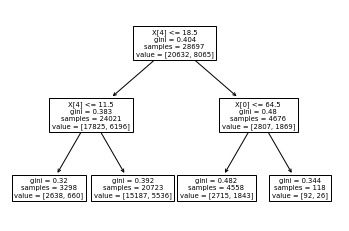

In [10]:
tree.plot_tree(clf);

#### Adjust Figure Size and Dots per inch (DPI)

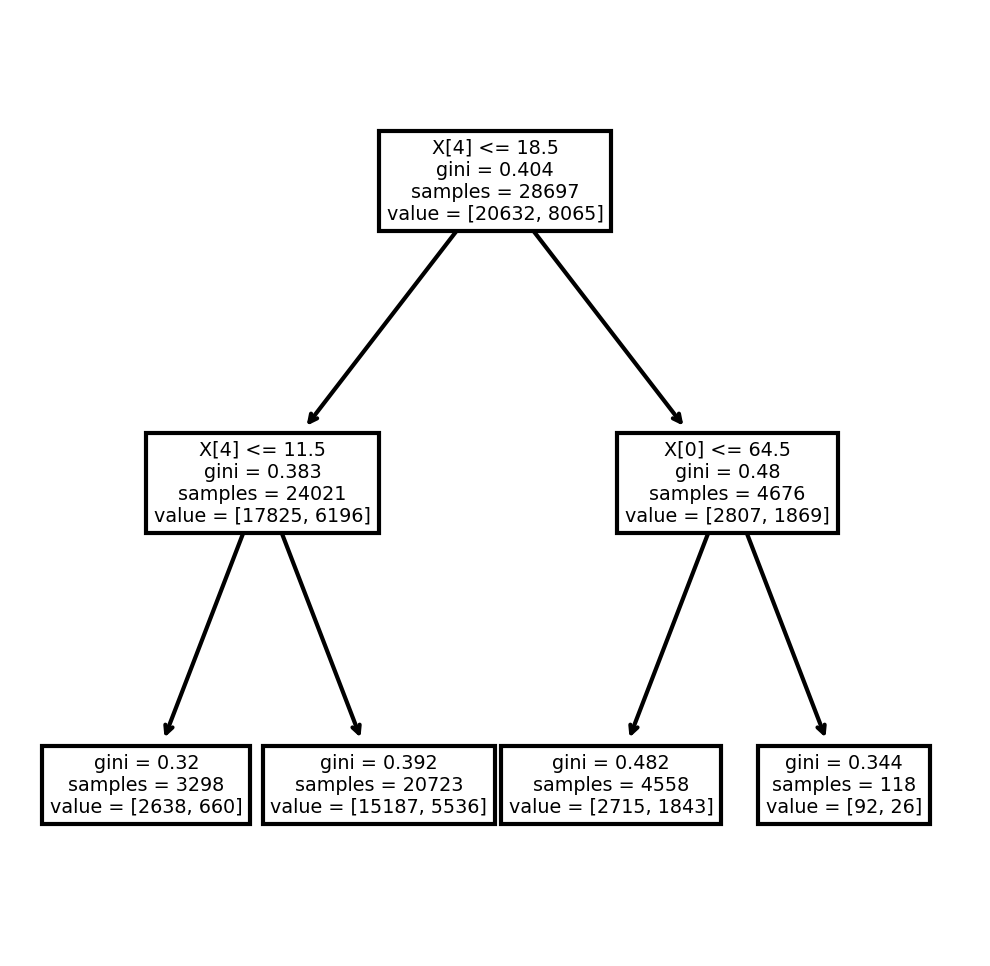

In [11]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(clf);

#### Make Tree More Interpretable
The code below not only allows you to save a visualization based on your model, but also makes the decision tree more interpretable by adding in feature and class names.

In [14]:
# Putting the feature names and class names into variables
fn = ['Age_AtReg', 'Disability', 'Gender', 'CitizenStatus', 'EducationLevel', 'Race_Hispanic', 'Race_NativeAmerican', 'Race_Asian', 'Race_AfricanAmerican', 'Race_PacificIslander', 'Race_White']
cn = ['Unemployed', 'Employed']

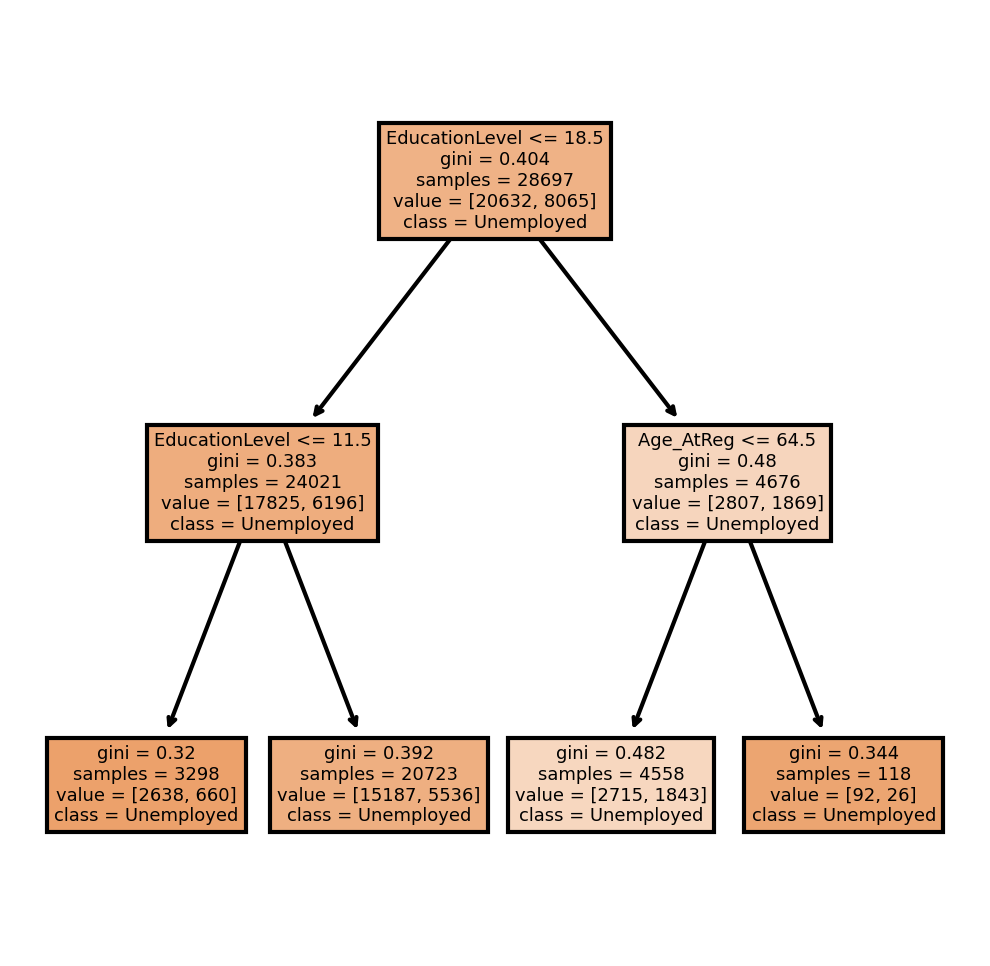

In [16]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('3_output/plottreefncn.png')